In [49]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
# Load the data from csv file
# Col 1 and 2 are the exam scores and col 3 is the label (0 - not admitted, 1 - admitted)
ex2data1 = np.loadtxt('ex2data1.txt', delimiter=',')

In [51]:
# See the first 5 rows in table format
print("First 5 rows of the data")
print(ex2data1[:5])
# Total number of rows
m = ex2data1.shape[0]
print("Total number of examples: ", m)
# Number of features
n = ex2data1.shape[1] - 1
print("Number of features in each example: ", n)

First 5 rows of the data
[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]]
Total number of examples:  100
Number of features in each example:  2


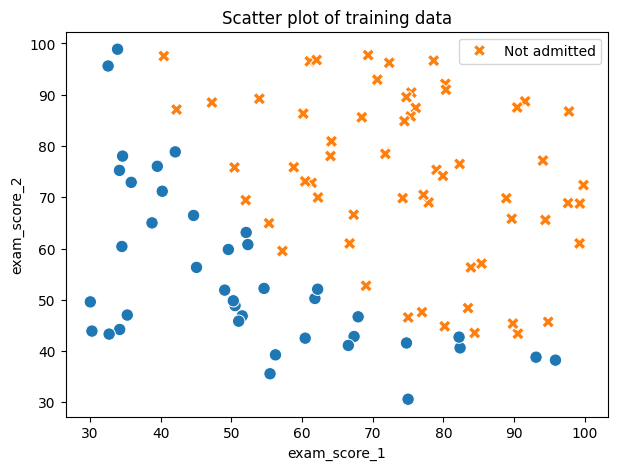

In [52]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='exam_score_1', y='exam_score_2', hue='label', data=pd.DataFrame(ex2data1, columns=['exam_score_1', 'exam_score_2', 'label']), style='label', s=80)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:], ['Not admitted', 'Admitted'])
plt.title('Scatter plot of training data')
plt.show(ax)

In [53]:
# Randomly split the data into training and validation sets (90% training, 10% validation)
# Set the seed value for reproducibility
np.random.seed(129)

# Randomly shuffle the data using above seed
np.random.shuffle(ex2data1)
train_data = ex2data1[:90, :2]
train_data = np.transpose(train_data)
validation_data = ex2data1[90:, :2]
validation_data = np.transpose(validation_data)

# Scale the data by dividing by 100
# train_data = train_data / 100
# validation_data = validation_data / 100

# Convert label data to a proper matrix format
train_labels = ex2data1[:90, 2]
train_labels = np.reshape(train_labels, (1, train_labels.shape[0]))
validation_labels = ex2data1[90:, 2]
validation_labels = np.reshape(validation_labels, (1, validation_labels.shape[0]))

In [54]:
# Define function to calculate Z from X, w and b
def forward_propagation(X, w, b):
    return np.dot(w.T, X) + b

In [55]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [56]:
# Define the cost function
def compute_cost(Y, A, m):
    epsilon = 1e-10
    return -np.sum(Y * np.log(A + epsilon) + (1 - Y) * np.log(1 - A + epsilon)) / m

In [57]:
# test the cost function
Y = np.array([[1, 0, 1]])
A = np.array([[0.8, 0.1, 0.9]])
print("Cost: ", compute_cost(Y, A, 3))

Cost:  0.14462152742754666


In [58]:
# Compute derivatives of w and b
def compute_derivatives(X, Y, A, m):
    dw = np.dot(X, (A - Y).T) / m
    db = np.sum(A - Y) / m
    return dw, db

In [59]:
# Update w and b
def update_parameters(w, b, dw, db, learning_rate):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

In [60]:
# Function to train the model using training data for given number of epochs
def train_model(X, Y, w, b, learning_rate, epochs):
    m = X.shape[1]
    cost = []
    train_accuracy = []
    for i in range(epochs):
        Z = forward_propagation(X, w, b)
        A = sigmoid(Z)
        cost.append(compute_cost(Y, A, m))
        dw, db = compute_derivatives(X, Y, A, m)
        w, b = update_parameters(w, b, dw, db, learning_rate)
        #print("Epoch: ", i, " Cost: ", cost)
        predictions = np.where(A >= 0.5, 1, 0)
        train_accuracy.append(np.mean(predictions == Y))
    return w, b, cost, train_accuracy

In [61]:
# Intialize w and b
w = np.random.rand(n, 1)
b = 0    

In [62]:
# Traing the model with training data
w, b, cost, train_acc = train_model(train_data, train_labels, w, b, 0.001, 1000)
print("w: ", w)
print("b: ", b)
print("Cost: ", cost[-5:-1])
print("Train accuracy: ", train_acc[-5:-1])

w:  [[0.0084065 ]
 [0.00356923]]
b:  -0.07663757953454843
Cost:  [0.6254134204332488, 0.6254085311496067, 0.6254036419527095, 0.6253987528425554]
Train accuracy:  [0.6, 0.6, 0.6, 0.6]


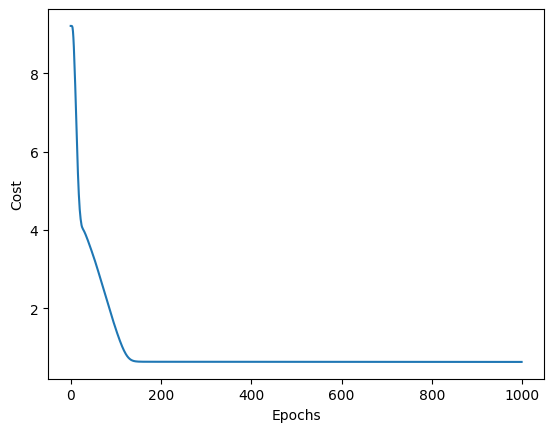

In [63]:
# Plot the cost function with respect to epochs
plt.plot(cost)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

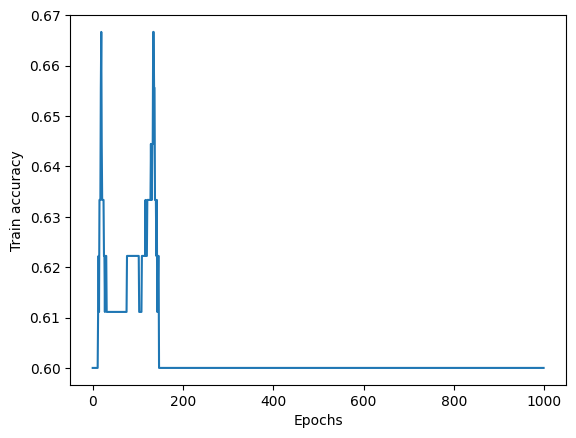

In [64]:
# Plot the train accuracy with respect to epochs
plt.plot(train_acc)
plt.ylabel('Train accuracy')
plt.xlabel('Epochs')
plt.show()

In [65]:
# Calculate the training accuracy
Z = forward_propagation(train_data, w, b)
A = sigmoid(Z)
predictions = np.where(A >= 0.5, 1, 0)
accuracy = np.mean(predictions == train_labels)
print("Training accuracy: ", accuracy)

Training accuracy:  0.6


In [66]:
# Test the model accuracy using validation data and with the updated w and b
Z = forward_propagation(validation_data, w, b)
A = sigmoid(Z)
predictions = (A >= 0.5).astype(int)
accuracy = np.mean(predictions == validation_labels)
print("Validation accuracy: ", accuracy)

Validation accuracy:  0.6


In [67]:
# For a student with scores 45, 85 and admit 1, calc model pred
scores = np.array([[45, 85]])
scores = np.transpose(scores)
Z = forward_propagation(scores, w, b)
A = sigmoid(Z)
print("Admission probability for a student with scores 45, 85: ", A)


Admission probability for a student with scores 45, 85:  [[0.64680841]]


In [68]:
# Plot the previous scatter plot with decision boundary
def plot_decision_boundary(w,b):
    plt.figure(figsize=(7,5))
    ax = sns.scatterplot(x='exam_score_1', y='exam_score_2', hue='label', data=pd.DataFrame(ex2data1, columns=['exam_score_1', 'exam_score_2', 'label']), style='label', s=80)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[1:], ['Not admitted', 'Admitted'])
    plt.title('Scatter plot of all data')
    plot_x = (np.array(ax.get_xlim()))
    plot_y = (-1/w[1]*(w[0]*plot_x + b))
    plt.plot(plot_x, plot_y, '-', c="green")
    plt.show(ax)

In [69]:
# w = np.array([[0.201], [0.20623159]])
# b = -25.161318

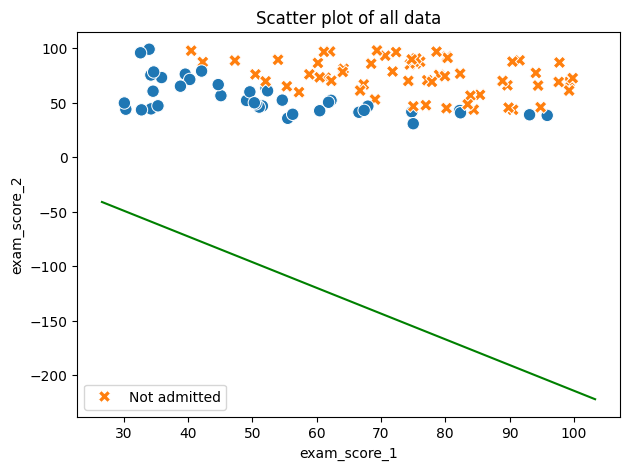

In [70]:
plot_decision_boundary(w,b)

In [71]:
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Load the dataset
data = pd.read_csv('ex2data1.txt', sep=',', header=None)
data.columns = ['exam_score_1', 'exam_score_2', 'label']
#data = pd.read_csv('admissions_data.csv')

# Separate features and target variable
X = data[['exam_score_1', 'exam_score_2']]
y = data['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create the logistic regression model
model = LR()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("ROC-AUC Score:", roc_auc)

# Predict admission probability for a new applicant
new_applicant = [[75, 90]]  
probability = model.predict_proba(new_applicant)[0][1] 
print("Probability of admission for new applicant:", probability) 


Accuracy: 0.84
Confusion Matrix:
 [[ 8  1]
 [ 3 13]]
ROC-AUC Score: 0.8506944444444443
Probability of admission for new applicant: 0.9998867198426601


/home/nikhil8490/Udacity/UdacityProjects/Self_Driving_Car_Engineer/venv_tensor_flow/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
